In [2]:
install.packages("arules")


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [3]:
install.packages("arulesViz")
install.packages("RColorBrewer")


also installing the dependencies ‘permute’, ‘rlang’, ‘scales’, ‘vctrs’, ‘tweenr’, ‘polyclip’, ‘RcppEigen’, ‘gridExtra’, ‘ca’, ‘cluster’, ‘gclus’, ‘qap’, ‘registry’, ‘TSP’, ‘vegan’, ‘cpp11’, ‘ggplot2’, ‘ggforce’, ‘ggrepel’, ‘viridis’, ‘tidygraph’, ‘graphlayouts’, ‘crosstalk’, ‘lazyeval’, ‘seriation’, ‘vcd’, ‘igraph’, ‘scatterplot3d’, ‘ggraph’, ‘DT’, ‘plotly’, ‘visNetwork’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [7]:
install.packages("rlang")


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [1]:
library(arules)
library(arulesViz)
library(RColorBrewer)

 Genres<- read.transactions("ARM_data.csv",
                             rm.duplicates = FALSE, 
                             format = "basket",  ##if you use "single" also use cols=c(1,2)
                             sep=",",  ## csv file
                             cols=NULL) ## The dataset has no row numbers
inspect(Genres)




Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write


Warning message in readLines(file, encoding = encoding):
“incomplete final line found on 'ARM_data.csv'”


       items                                     
[1]    {1 bath, 1 bedroom, 2 garage, 2 stories}  
[2]    {2 garage, 2 stories, 3 bath, 4 bedroom}  
[3]    {1 garage, 2 stories, 3 bath, 4 bedroom}  
[4]    {2 bath, 2 garage, 2 stories, 4 bedroom}  
[5]    {0 bath, 2 garage, 2 stories, 4 bedroom}  
[6]    {1 stories, 2 bath, 2 garage, 3 bedroom}  
[7]    {2 garage, 3 stories, 4 bath, 4 bedroom}  
[8]    {2 stories, 4 bedroom, 5 bath, 6 garage}  
[9]    {1 stories, 2 bath, 2 garage, 3 bedroom}  
[10]   {2 garage, 2 stories, 4 bath, 6 bedroom}  
[11]   {1 bath, 1 stories, 2 bedroom, 2 garage}  
[12]   {1 stories, 2 bath, 2 garage, 3 bedroom}  
[13]   {1 bath, 2 bedroom, 2 garage, 2 stories}  
[14]   {1 bath, 1 stories, 2 bedroom, 2 garage}  
[15]   {2 stories, 4 garage, 5 bath, 5 bedroom}  
[16]   {1 bath, 1 stories, 2 bedroom, 2 garage}  
[17]   {4 garage, 4 stories, 5 bedroom, 6 bath}  
[18]   {2 stories, 3 garage, 6 bath, 6 bedroom}  
[19]   {2 stories, 3 bath, 3 bedroom, 3 garage}  


In [6]:
##### Use apriori to get the RULES
Frules = arules::apriori(Genres, parameter = list(support=.01, 
                                          confidence=.05, minlen=2))
inspect(Frules)



Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.05    0.1    1 none FALSE            TRUE       5    0.01      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 44 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[48 item(s), 4440 transaction(s)] done [0.00s].
sorting and recoding items ... [21 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [458 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
      lhs                                 rhs         support    confidence
[1]   {1 bedroom}                      => {1 bath}    0.01486486 0.85714286
[2]   {1 bath}                         => {1 bedroom} 0.01486486 0.24905660
[3]   {1 bedroom}                      => {1 stories} 0.011

In [5]:
FrulesLiftFiltered <- subset(Frules, lift > 1.2)


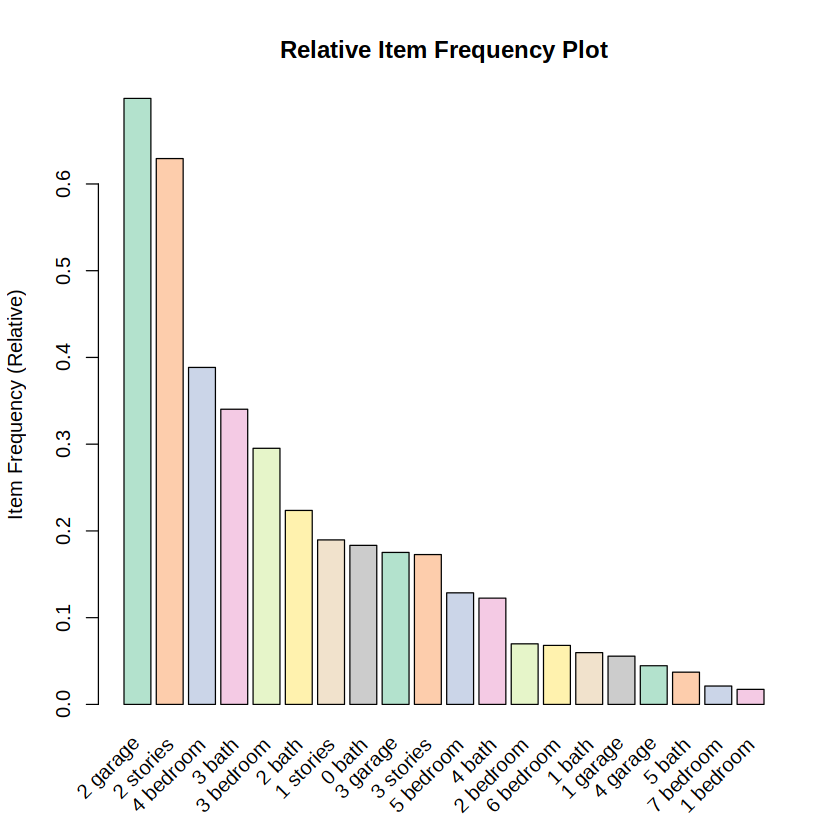

In [7]:
## Plot of which items are most frequent
arules::itemFrequencyPlot(Genres, topN = 20,
                          col = brewer.pal(8, 'Pastel2'),
                          main = 'Relative Item Frequency Plot',
                          type = "relative", #absolute
                          ylab = "Item Frequency (Relative)")

In [5]:
## Sort rules by a measure such as conf, sup, or lift
SortedRules <- sort(Frules, by="support", decreasing=TRUE)
inspect(SortedRules[1:15])
(summary(SortedRules))


     lhs                       rhs         support   confidence coverage 
[1]  {2 stories}            => {2 garage}  0.4740991 0.7534001  0.6292793
[2]  {2 garage}             => {2 stories} 0.4740991 0.6785945  0.6986486
[3]  {4 bedroom}            => {2 garage}  0.3072072 0.7907246  0.3885135
[4]  {2 garage}             => {4 bedroom} 0.3072072 0.4397163  0.6986486
[5]  {4 bedroom}            => {2 stories} 0.3000000 0.7721739  0.3885135
[6]  {2 stories}            => {4 bedroom} 0.3000000 0.4767359  0.6292793
[7]  {2 stories, 4 bedroom} => {2 garage}  0.2585586 0.8618619  0.3000000
[8]  {2 garage, 4 bedroom}  => {2 stories} 0.2585586 0.8416422  0.3072072
[9]  {2 garage, 2 stories}  => {4 bedroom} 0.2585586 0.5453682  0.4740991
[10] {3 bath}               => {2 garage}  0.2315315 0.6803441  0.3403153
[11] {2 garage}             => {3 bath}    0.2315315 0.3313991  0.6986486
[12] {3 bath}               => {2 stories} 0.2301802 0.6763733  0.3403153
[13] {2 stories}            => {3 bath

set of 458 rules

rule length distribution (lhs + rhs):sizes
  2   3   4 
150 244  64 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   2.000   3.000   2.812   3.000   4.000 

summary of quality measures:
    support          confidence         coverage            lift        
 Min.   :0.01014   Min.   :0.05059   Min.   :0.01149   Min.   : 0.2706  
 1st Qu.:0.01486   1st Qu.:0.22558   1st Qu.:0.04482   1st Qu.: 0.8535  
 Median :0.02500   Median :0.39303   Median :0.09054   Median : 1.2250  
 Mean   :0.04999   Mean   :0.41497   Mean   :0.14530   Mean   : 1.7768  
 3rd Qu.:0.05135   3rd Qu.:0.57257   3rd Qu.:0.18316   3rd Qu.: 2.0976  
 Max.   :0.47410   Max.   :1.00000   Max.   :0.69865   Max.   :16.9383  
     count     
 Min.   :  45  
 1st Qu.:  66  
 Median : 111  
 Mean   : 222  
 3rd Qu.: 228  
 Max.   :2105  

mining info:
   data ntransactions support confidence
 Genres          4440    0.01       0.05
                                                                 

In [6]:
## Sort rules by a measure such as conf, sup, or lift
SortedRules <- sort(Frules, by="confidence", decreasing=TRUE)
inspect(SortedRules[1:15])
(summary(SortedRules))



     lhs                               rhs         support    confidence
[1]  {0 bath}                       => {2 stories} 0.18333333 1.0000000 
[2]  {0 bath}                       => {2 garage}  0.18333333 1.0000000 
[3]  {0 bath, 4 bedroom}            => {2 stories} 0.18265766 1.0000000 
[4]  {0 bath, 4 bedroom}            => {2 garage}  0.18265766 1.0000000 
[5]  {0 bath, 2 stories}            => {2 garage}  0.18333333 1.0000000 
[6]  {0 bath, 2 garage}             => {2 stories} 0.18333333 1.0000000 
[7]  {0 bath, 2 stories, 4 bedroom} => {2 garage}  0.18265766 1.0000000 
[8]  {0 bath, 2 garage, 4 bedroom}  => {2 stories} 0.18265766 1.0000000 
[9]  {0 bath}                       => {4 bedroom} 0.18265766 0.9963145 
[10] {0 bath, 2 stories}            => {4 bedroom} 0.18265766 0.9963145 
[11] {0 bath, 2 garage}             => {4 bedroom} 0.18265766 0.9963145 
[12] {0 bath, 2 garage, 2 stories}  => {4 bedroom} 0.18265766 0.9963145 
[13] {1 bedroom, 1 stories}         => {1 bath}    

set of 458 rules

rule length distribution (lhs + rhs):sizes
  2   3   4 
150 244  64 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   2.000   3.000   2.812   3.000   4.000 

summary of quality measures:
    support          confidence         coverage            lift        
 Min.   :0.01014   Min.   :0.05059   Min.   :0.01149   Min.   : 0.2706  
 1st Qu.:0.01486   1st Qu.:0.22558   1st Qu.:0.04482   1st Qu.: 0.8535  
 Median :0.02500   Median :0.39303   Median :0.09054   Median : 1.2250  
 Mean   :0.04999   Mean   :0.41497   Mean   :0.14530   Mean   : 1.7768  
 3rd Qu.:0.05135   3rd Qu.:0.57257   3rd Qu.:0.18316   3rd Qu.: 2.0976  
 Max.   :0.47410   Max.   :1.00000   Max.   :0.69865   Max.   :16.9383  
     count     
 Min.   :  45  
 1st Qu.:  66  
 Median : 111  
 Mean   : 222  
 3rd Qu.: 228  
 Max.   :2105  

mining info:
   data ntransactions support confidence
 Genres          4440    0.01       0.05
                                                                 

In [12]:
SortedRulesL <- sort(Frules, by="lift", decreasing=TRUE)
inspect(SortedRulesL[1:15])
(summary(SortedRulesL))



     lhs                                 rhs         support    confidence
[1]  {1 bath, 1 stories}              => {1 bedroom} 0.01058559 0.2937500 
[2]  {1 bedroom, 1 stories}           => {1 bath}    0.01058559 0.9215686 
[3]  {1 bath, 2 garage}               => {1 bedroom} 0.01238739 0.2500000 
[4]  {1 bedroom, 2 garage}            => {1 bath}    0.01238739 0.8593750 
[5]  {1 bath}                         => {1 bedroom} 0.01486486 0.2490566 
[6]  {1 bedroom}                      => {1 bath}    0.01486486 0.8571429 
[7]  {1 stories, 2 bedroom, 2 garage} => {1 bath}    0.01621622 0.4965517 
[8]  {1 stories, 2 bedroom}           => {1 bath}    0.01846847 0.4712644 
[9]  {1 bath, 1 stories, 2 garage}    => {2 bedroom} 0.01621622 0.5294118 
[10] {1 bath, 1 stories}              => {2 bedroom} 0.01846847 0.5125000 
[11] {2 bedroom, 2 garage}            => {1 bath}    0.02229730 0.3928571 
[12] {1 bath, 2 garage}               => {2 bedroom} 0.02229730 0.4500000 
[13] {1 bath}            

set of 458 rules

rule length distribution (lhs + rhs):sizes
  2   3   4 
150 244  64 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   2.000   3.000   2.812   3.000   4.000 

summary of quality measures:
    support          confidence         coverage            lift        
 Min.   :0.01014   Min.   :0.05059   Min.   :0.01149   Min.   : 0.2706  
 1st Qu.:0.01486   1st Qu.:0.22558   1st Qu.:0.04482   1st Qu.: 0.8535  
 Median :0.02500   Median :0.39303   Median :0.09054   Median : 1.2250  
 Mean   :0.04999   Mean   :0.41497   Mean   :0.14530   Mean   : 1.7768  
 3rd Qu.:0.05135   3rd Qu.:0.57257   3rd Qu.:0.18316   3rd Qu.: 2.0976  
 Max.   :0.47410   Max.   :1.00000   Max.   :0.69865   Max.   :16.9383  
     count     
 Min.   :  45  
 1st Qu.:  66  
 Median : 111  
 Mean   : 222  
 3rd Qu.: 228  
 Max.   :2105  

mining info:
   data ntransactions support confidence
 Genres          4440    0.01       0.05
                                                                 

HTML widgets cannot be represented in plain text (need html)

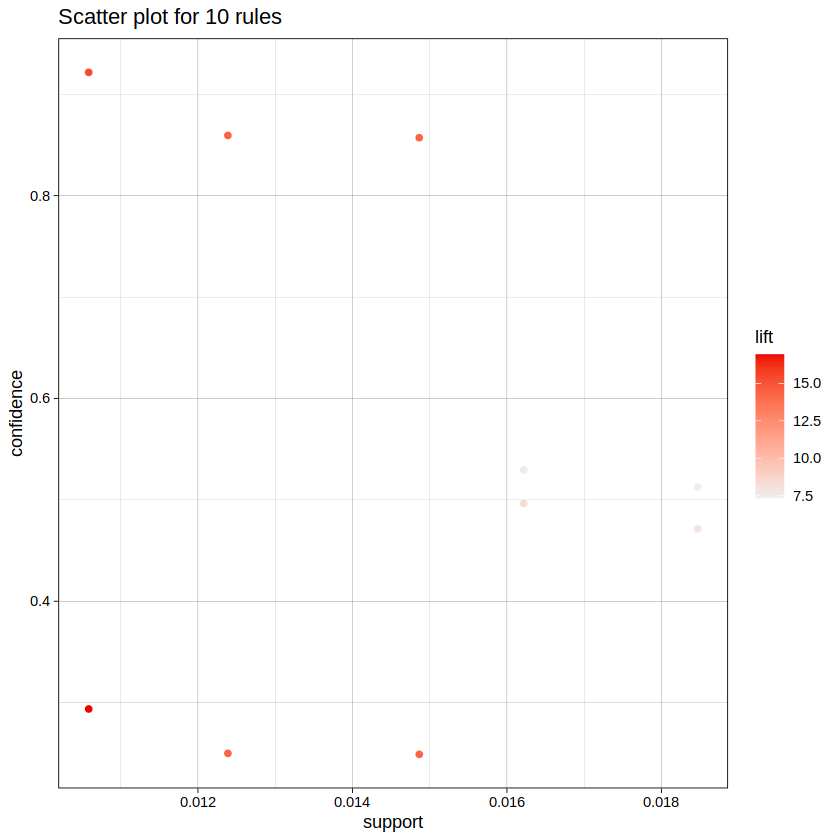

In [14]:
## Visualize
## tcltk
library(arulesViz)
subrules <- head(sort(SortedRules, by="lift"),10)
plot(subrules)

#plot(subrules, method="graph", engine="interactive")
plot(subrules, method="graph", engine="htmlwidget")

Warning message:
“Unknown control parameters: type”


Available control parameters (with default values):
layout	 =  stress
circular	 =  FALSE
ggraphdots	 =  NULL
edges	 =  <environment>
nodes	 =  <environment>
nodetext	 =  <environment>
colors	 =  c("#EE0000FF", "#EEEEEEFF")
engine	 =  ggplot2
max	 =  100
verbose	 =  FALSE


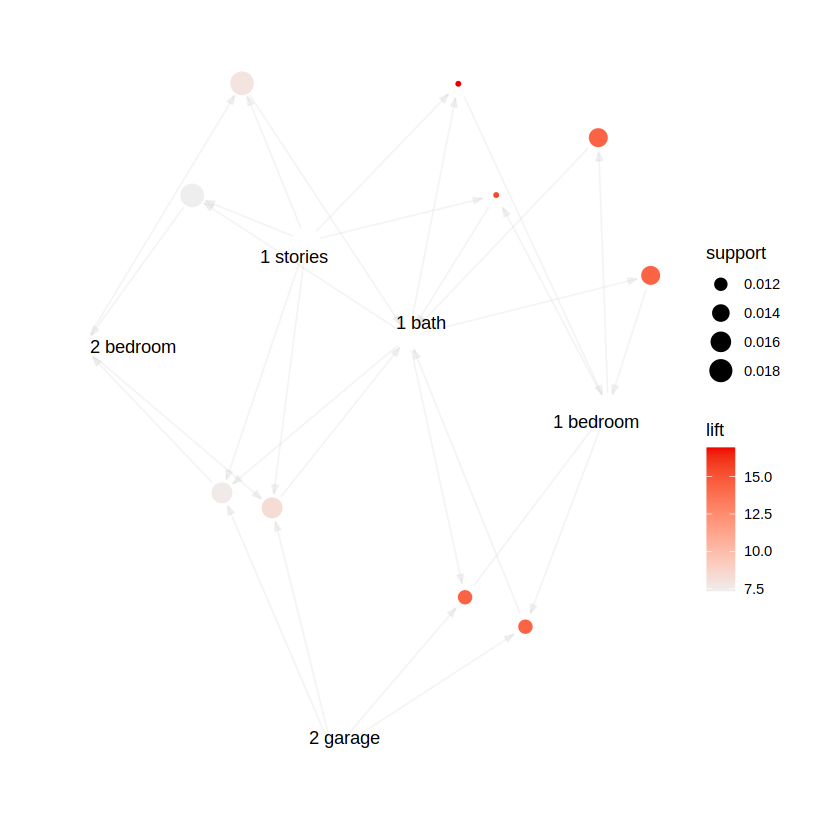

In [13]:
# Network Graph Visualization
plot(subrules, method="graph", control=list(type="items"))
